In [1]:
#Packages to use
import scanpy as sc
import seaborn as sns
import numpy as np
import anndata as ad
import scvi
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import biomart

#Directory to work out of
directory = '/Users/david/Dropbox/RNASeq/BNST'

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [2]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=WP_CYTOPLASMIC_RIBOSOMAL_PROTEINS&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)

In [20]:
np.sum(adata.var_names.str.startswith('mt-'))

25

In [21]:
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


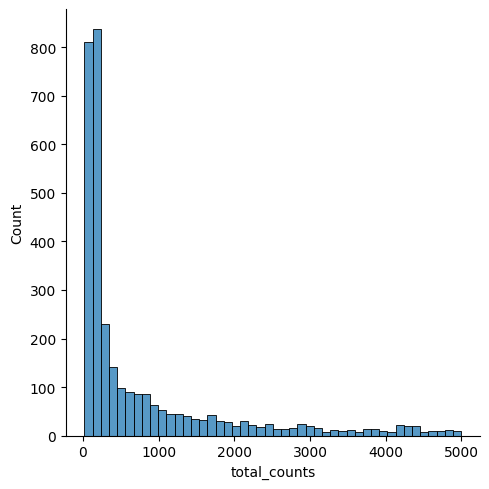

In [25]:
sns.displot(adata.obs['total_counts'][adata.obs["total_counts"] > 10][adata.obs["total_counts"] < 5000])

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


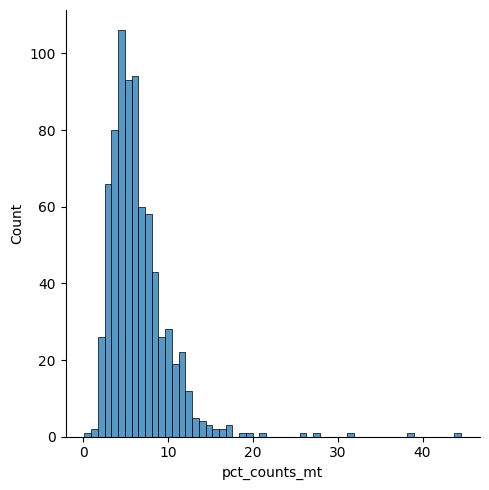

In [28]:
sns.displot(adata.obs['pct_counts_mt'][adata.obs["total_counts"] > 1000][adata.obs["total_counts"] < 5000])

In [29]:
adata.var['ribo'] = adata.var_names.str.lower().isin(ribo_genes[0].str.lower())

In [30]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["ribo"], inplace=True)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py:422: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


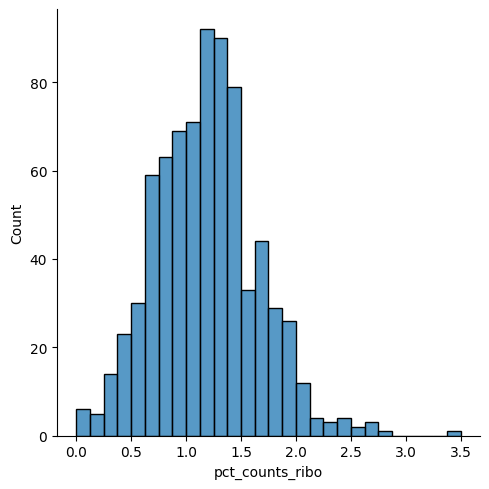

In [33]:
sns.displot(adata.obs['pct_counts_ribo'][adata.obs["total_counts"] > 1000][adata.obs["total_counts"] < 5000])

In [34]:
def preprocess(matrix_path,name):
    adata = sc.read(matrix_path)
    adata = adata.transpose()
    adata.obs['Sample'] = name
    sc.pp.filter_cells(adata, min_counts = 1000)
    sc.pp.filter_cells(adata, max_counts = 40000)
    #sc.pp.filter_genes(adata, min_cells = 10) #filter once concatenated across sessions
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.str.lower().isin(ribo_genes[0].str.lower())
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 4]
    #adata.var_names_make_unique()
    #adata.var_names_make_unique()
    adata.obs.index=adata.obs['Sample'].to_numpy() + ":" + np.array(adata.obs.index)

    return adata

In [35]:
names = ['BF','BG','BH','BI']
files = ['GSM3842061_MLB005_BFp1-N701_merged_GE_clean.bam.dge_3600.txt',
         'GSM3842062_MLB005_BGp1-N702_merged_GE_clean.bam.dge_1800.txt',
         'GSM3842063_MLB005_BHp1-N703_merged_GE_clean.bam.dge_2400.txt',
         'GSM3842064_MLB005_BIp1-N704_merged_GE_clean.bam.dge_2400.txt']
out = []
for x in range(0,4):
    #print(directory + '/Matrices/' + files[x])
    #print(names[x])
    out.append(preprocess(directory + '/Matrices/' + files[x],names[x]))

Only considering the two last: ['.dge_3600', '.txt'].
Only considering the two last: ['.dge_3600', '.txt'].
Only considering the two last: ['.dge_1800', '.txt'].
Only considering the two last: ['.dge_1800', '.txt'].
Only considering the two last: ['.dge_2400', '.txt'].
Only considering the two last: ['.dge_2400', '.txt'].
Only considering the two last: ['.dge_2400', '.txt'].
Only considering the two last: ['.dge_2400', '.txt'].


In [118]:
adata = sc.concat(out)
sc.pp.filter_genes(adata, min_cells = 1) #get rid of genes with no counts
adata.X.shape

(3348, 15075)

In [37]:
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)

In [38]:
adata.write_h5ad(directory + '/combined.h5ad')

In [2]:
adata = sc.read_h5ad(directory + '/combined.h5ad')
adata.obs.index

Index(['BF:AATTTCCCGTCA', 'BF:TTGTTGCGTCCT', 'BF:AACGCGGTTCAC',
       'BF:CTTGAGAGCGCC', 'BF:TACACCCTCTCC', 'BF:TTCCCCGTTCCT',
       'BF:TTCGGTTCTCAT', 'BF:AGTGTTCCGGAC', 'BF:TTGCATCTCAGA',
       'BF:AGCTATGTCGAT',
       ...
       'BI:TATAGAAGAGGG', 'BI:GGCTGCTGAACN', 'BI:CTGGCTAACGAG',
       'BI:CCAATGACATCG', 'BI:AACAACTGCTTG', 'BI:ATCTGTGTCCCT',
       'BI:GTGCCCTGATGC', 'BI:TGTAACGTGTGA', 'BI:CCCACGCCACCA',
       'BI:AGTCACGTGGTC'],
      dtype='object', length=2915)

In [40]:
adata.layers['counts'] = adata.X.copy() #save a raw counts version

In [41]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, layer='counts', flavor = 'seurat_v3', batch_key='Sample')
adata.X.shape

(3348, 2000)

In [42]:
scvi.model.SCVI.setup_anndata(adata, layer = 'counts',
                             batch_key='Sample')#,
                             #continuous_covariate_keys=['total_counts','pct_counts_mt', 'pct_counts_ribo'])
model = scvi.model.SCVI(adata)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [43]:
model.train() #may take a while without GPU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/400:   0%|                                                                              | 0/400 [00:00<?, ?it/s]

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 400/400: 100%|██████████████| 400/400 [02:46<00:00,  2.44it/s, v_num=1, train_loss_step=520, train_loss_epoch=508]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████| 400/400 [02:46<00:00,  2.40it/s, v_num=1, train_loss_step=520, train_loss_epoch=508]


In [44]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [18]:
#adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [45]:
solo_batch_1 = scvi.external.SOLO.from_scvi_model(model, restrict_to_batch='BF')
solo_batch_1.train()
b1p = solo_batch_1.predict()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 222/400:  56%|█████▌    | 222/400 [00:12<00:10, 17.10it/s, v_num=1, train_loss_step=0.235, train_loss_epoch=0.238]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.276. Signaling Trainer to stop.


In [46]:
solo_batch_2 = scvi.external.SOLO.from_scvi_model(model, restrict_to_batch='BG')
solo_batch_2.train()
b2p = solo_batch_2.predict()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [00:15<00:00, 25.85it/s, v_num=1, train_loss_step=0.159, train_loss_epoch=0.168]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [00:15<00:00, 25.26it/s, v_num=1, train_loss_step=0.159, train_loss_epoch=0.168]


In [47]:
solo_batch_3 = scvi.external.SOLO.from_scvi_model(model, restrict_to_batch='BH')
solo_batch_3.train()
b3p = solo_batch_3.predict()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 282/400:  70%|███████▊   | 282/400 [00:10<00:04, 25.80it/s, v_num=1, train_loss_step=0.273, train_loss_epoch=0.21]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.375. Signaling Trainer to stop.


In [48]:
solo_batch_4 = scvi.external.SOLO.from_scvi_model(model, restrict_to_batch='BI')
solo_batch_4.train()
b4p = solo_batch_4.predict()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 201/400:  50%|████▌    | 201/400 [00:08<00:08, 22.57it/s, v_num=1, train_loss_step=0.0648, train_loss_epoch=0.247]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.310. Signaling Trainer to stop.


In [49]:
dps = pd.concat([b1p,b2p,b3p,b4p],axis=0)
dps['isdoublet']=dps['doublet']>dps['singlet']

In [50]:
adata=adata[dps['isdoublet']==False]
adata.X.shape

(2915, 2000)

In [51]:
adata.write_h5ad(directory + '/integrated.h5ad')

In [7]:
adata = sc.read_h5ad(directory + '/combined.h5ad')
adata_scvi = sc.read_h5ad(directory + '/integrated.h5ad')

In [4]:
barcodes_inc = adata_scvi.obs.index
adata = adata[adata.obs.index.isin(barcodes_inc)]

In [120]:
adata.obsm['X_scVI'] = adata_scvi.obsm['X_scVI']

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_45312/1727488006.py:1: ImplicitModificationWarning: Setting element `.obsm['X_scVI']` of view, initializing view as actual.
  adata.obsm['X_scVI'] = adata_scvi.obsm['X_scVI']


In [5]:
adata.layers['counts'] = adata.X.copy() #save a raw counts version

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_54628/3940953031.py:1: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  adata.layers['counts'] = adata.X.copy() #save a raw counts version


In [10]:
#sc.pp.neighbors(adata, n_pcs = 19)
sc.pp.neighbors(adata, use_rep = 'X_scVI', n_neighbors = 50)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


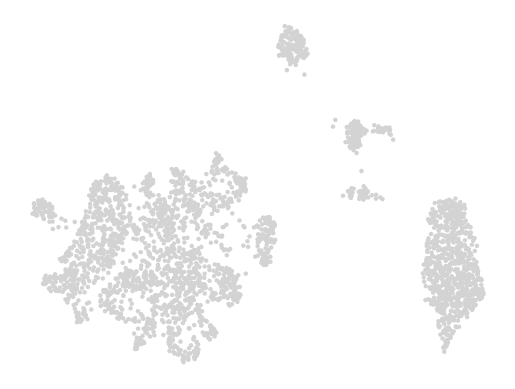

In [11]:
sc.tl.umap(adata, min_dist=0.5)
sc.pl.umap(adata, frameon = False)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


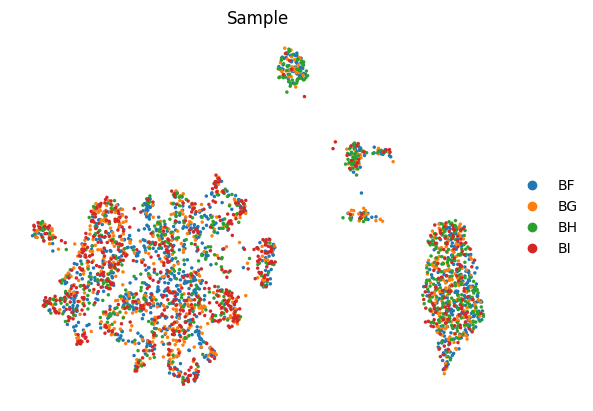

In [12]:
kwargs = {'alpha': 1}
sc.pl.umap(adata, color = ['Sample'], size = 25, frameon = False, **kwargs)

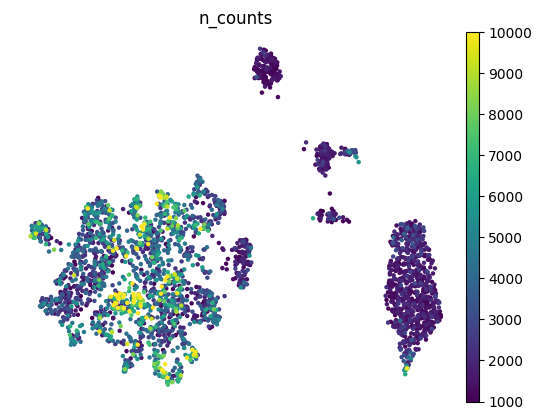

In [13]:
sc.pl.umap(adata, color = ['n_counts'], frameon = False, vmax = 10000)

In [24]:
sc.tl.leiden(adata, resolution = 0.4)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


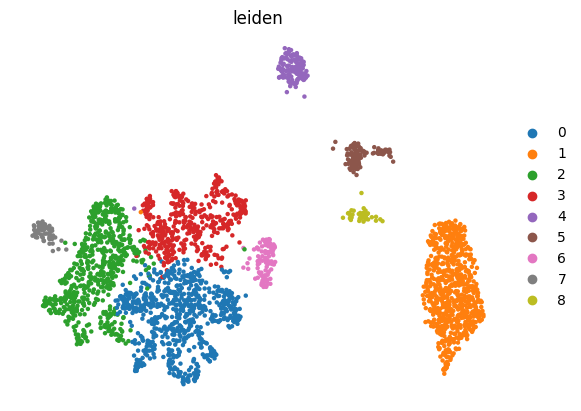

In [25]:
sc.pl.umap(adata, color = ['leiden'], frameon = False)

In [33]:
cell_type = {"0":"Neurons",
             "1":"Oligodendrocytes",
"3":"Neurons",
"2":"Neurons",
"4":"Astrocytes",
"5":"Oligo. precursor cells",
"6":"Neurons",
             "7":"Neurons",
             "8":"Fibr./Pericyte/Endothel.",
}

adata.obs['celltype'] = adata.obs.leiden.map(cell_type)

In [31]:
ctcolors = {"Neurons":(0.71, 0.88, 0.54),
            "Oligodendrocytes":(0.86, 0.52, 0.83),
            "Astrocytes":(0.58, 0.73, 0.94),
            "Oligo. precursor cells":(0.97, 0.62, 0.62),
            "Microglia":(0.97, 0.8, 0.55),
            "Fibr./Pericyte/Endothel.":(0.97, 0.93, 0.68),
           }

In [28]:
plt.rcParams['figure.dpi'] = 300

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


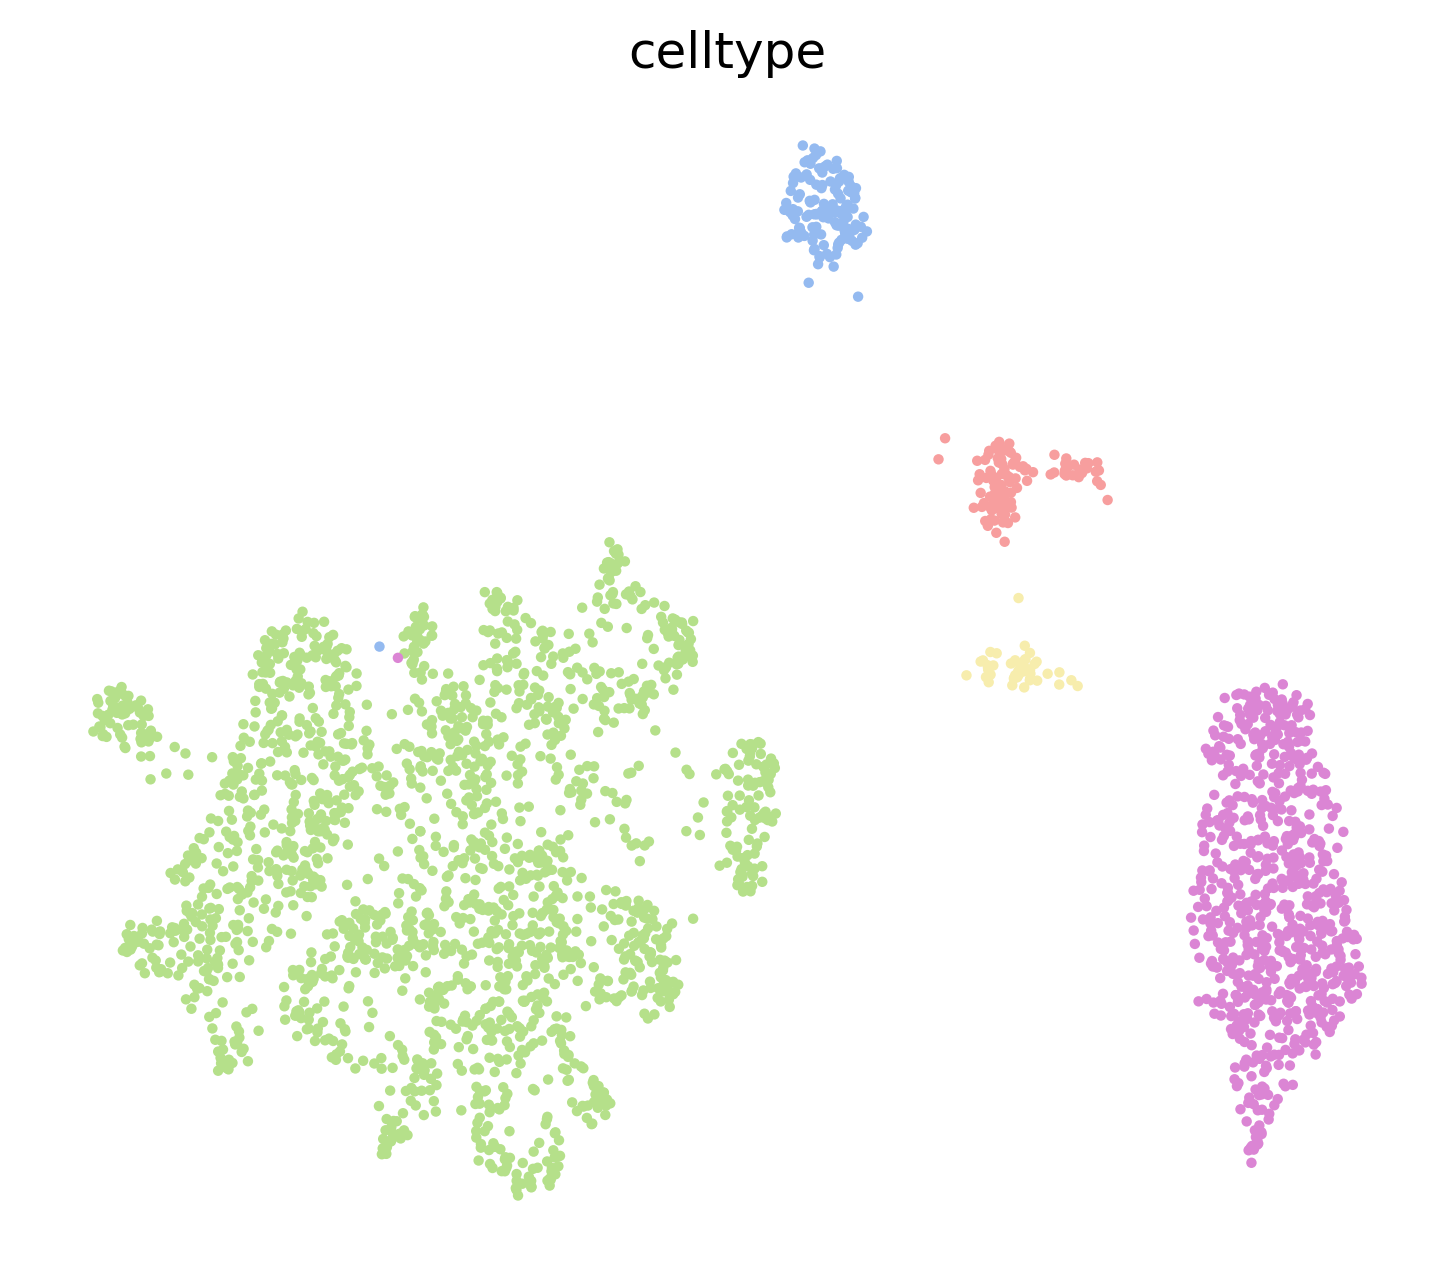

In [34]:
plt.figure(figsize = (6,5))
um = plt.subplot(1,1,1)
um = sc.pl.umap(adata, color = ['celltype'], frameon = False, size=25, ax = um, palette = ctcolors, show=False, legend_loc='off right')
plt.savefig(directory + '/Figures/cellsUMAP.png')

In [35]:
ctcolorsN = {"Neurons":(0.71, 0.88, 0.54),
            "Oligodendrocytes":(0.8, 0.8, 0.8),
            "Astrocytes":(0.8, 0.8, 0.8),
            "Oligo. precursor cells":(0.8, 0.8, 0.8),
            "Microglia":(0.8, 0.8, 0.8),
            "Fibr./Pericyte/Endothel.":(0.8, 0.8, 0.8),
           }

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


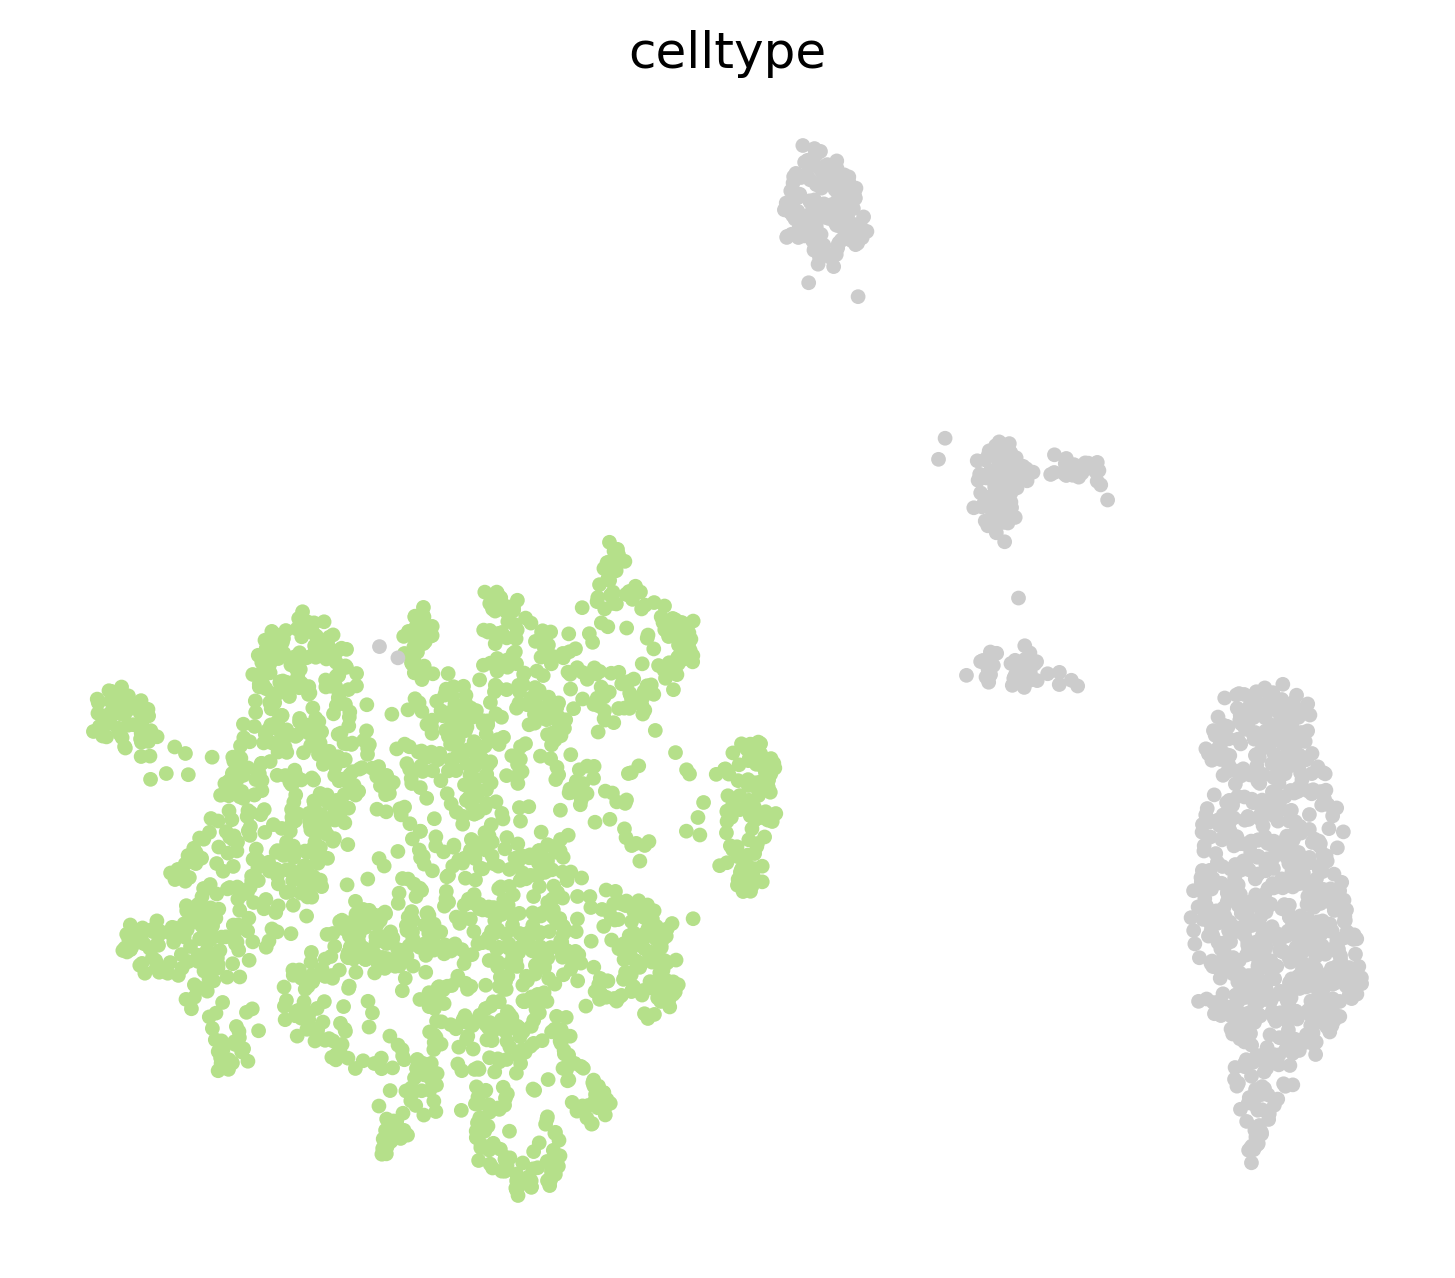

In [37]:
plt.figure(figsize = (6,5))
um = plt.subplot(1,1,1)
um = sc.pl.umap(adata, color = ['celltype'], frameon = False, size=50, ax = um, palette = ctcolorsN, show=False, legend_loc='off right')
plt.savefig(directory + '/Figures/cellsUMAPN.png')

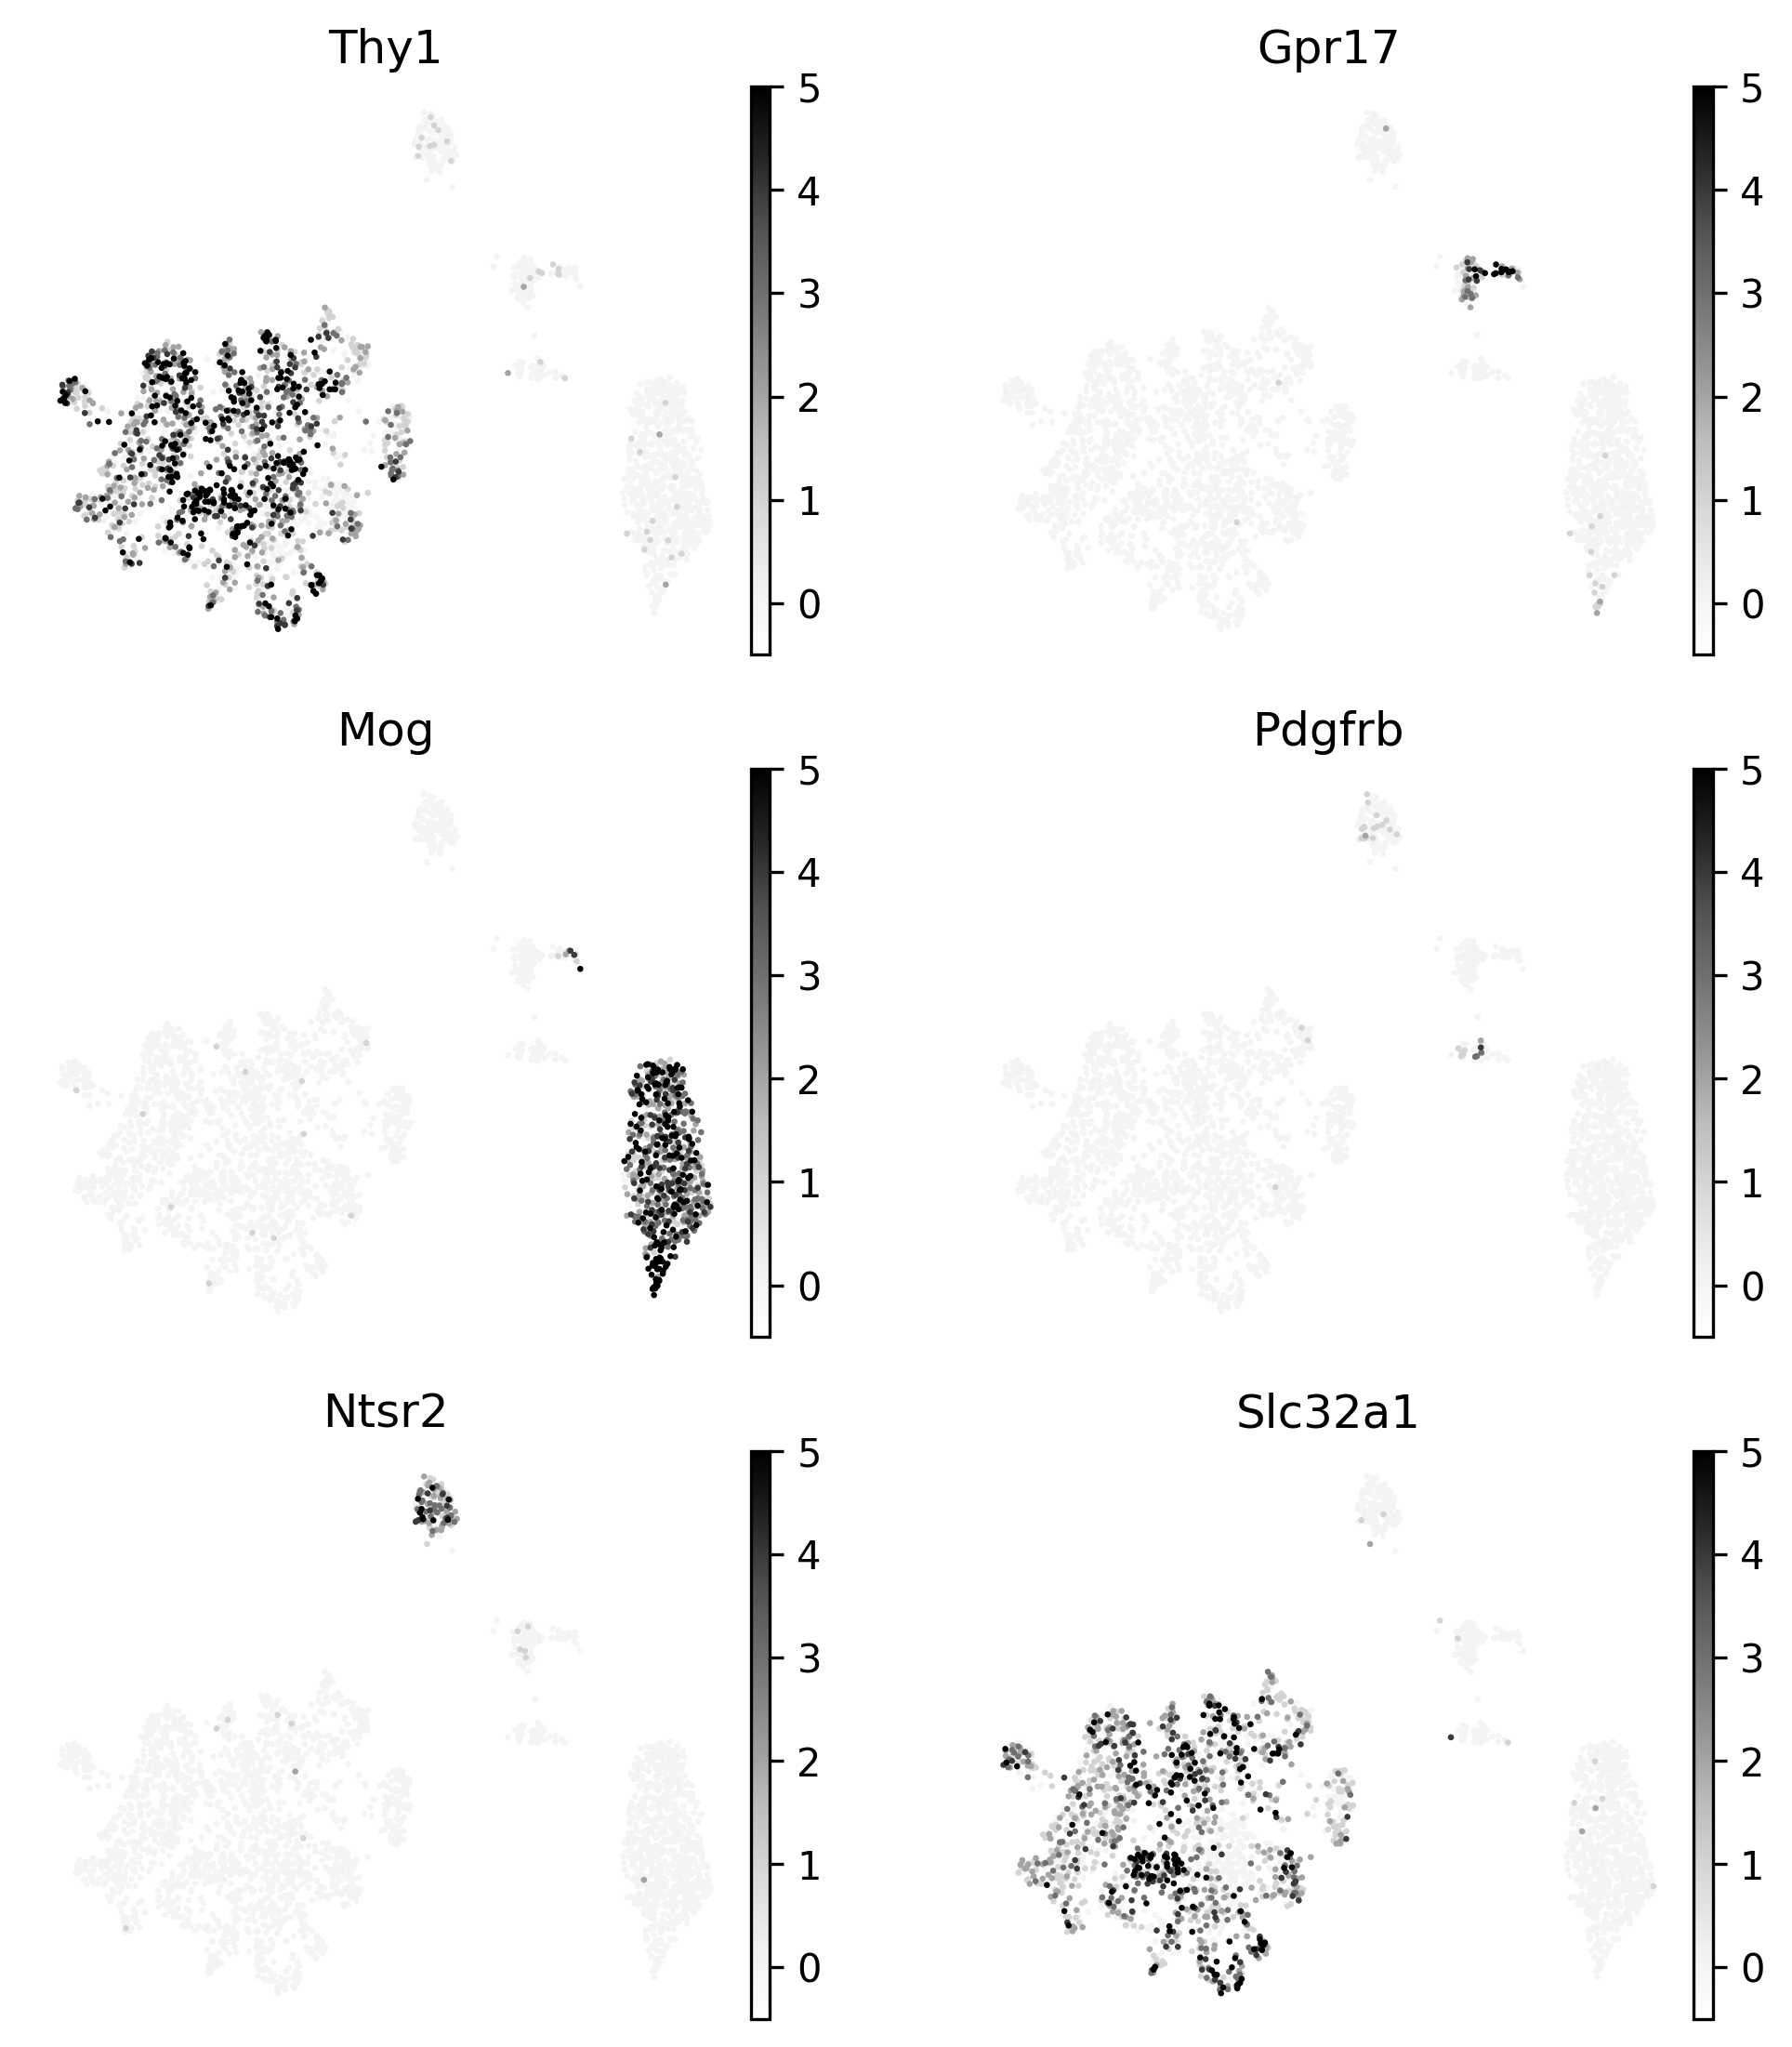

In [38]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Thy1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)
um = sc.pl.umap(adata, color = ['Gpr17'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)
um = sc.pl.umap(adata, color = ['Mog'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Pdgfrb'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Ntsr2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Slc32a1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
plt.savefig(directory + '/Figures/cellsExpression.png')

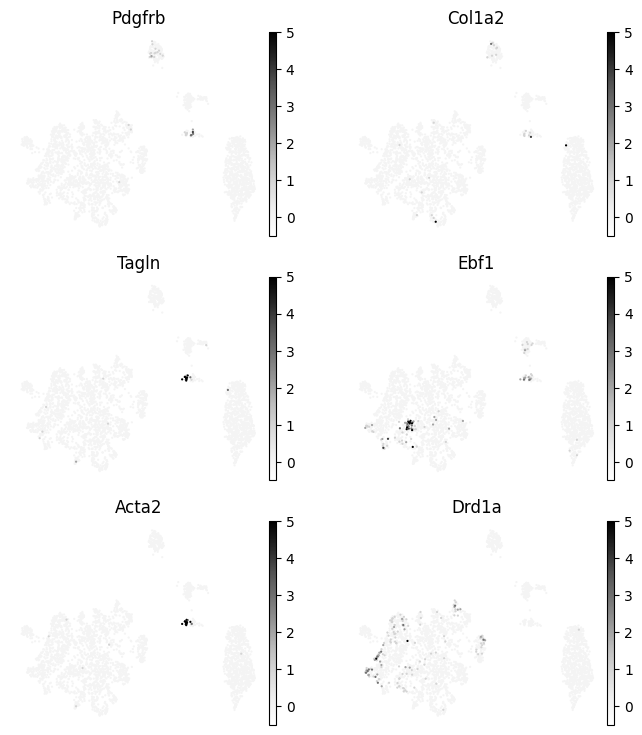

In [19]:
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Pdgfrb'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,2)
um = sc.pl.umap(adata, color = ['Col1a2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,3)
um = sc.pl.umap(adata, color = ['Tagln'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,4)
um = sc.pl.umap(adata, color = ['Ebf1'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,5)
um = sc.pl.umap(adata, color = ['Acta2'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)
um = plt.subplot(3,2,6)
um = sc.pl.umap(adata, color = ['Drd1a'], frameon = False,
                size=10, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                cmap='Grays',show=False)

In [74]:
gpcolors = {"BF":np.divide((106, 106, 106),256),
            "BG":np.divide((175, 175, 175),256),
            "BH":np.divide((148, 35, 236),256),
            "BI":np.divide((208, 158, 247),256),
           }

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


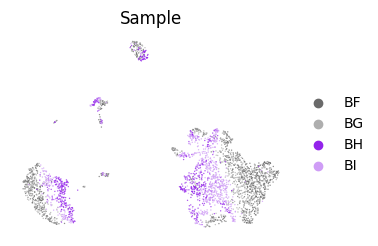

In [75]:
kwargs = {'alpha': 0.75}
plt.figure(figsize = (8,9))
um = plt.subplot(3,2,1)
um = sc.pl.umap(adata, color = ['Sample'], frameon = False,
                size=4, ax = um, layer = 'counts', vmin=-0.5, vmax=5,
                show=False, palette = gpcolors, **kwargs)
plt.savefig(directory + '/Figures/cellsGroupUMAP.png')

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-pack

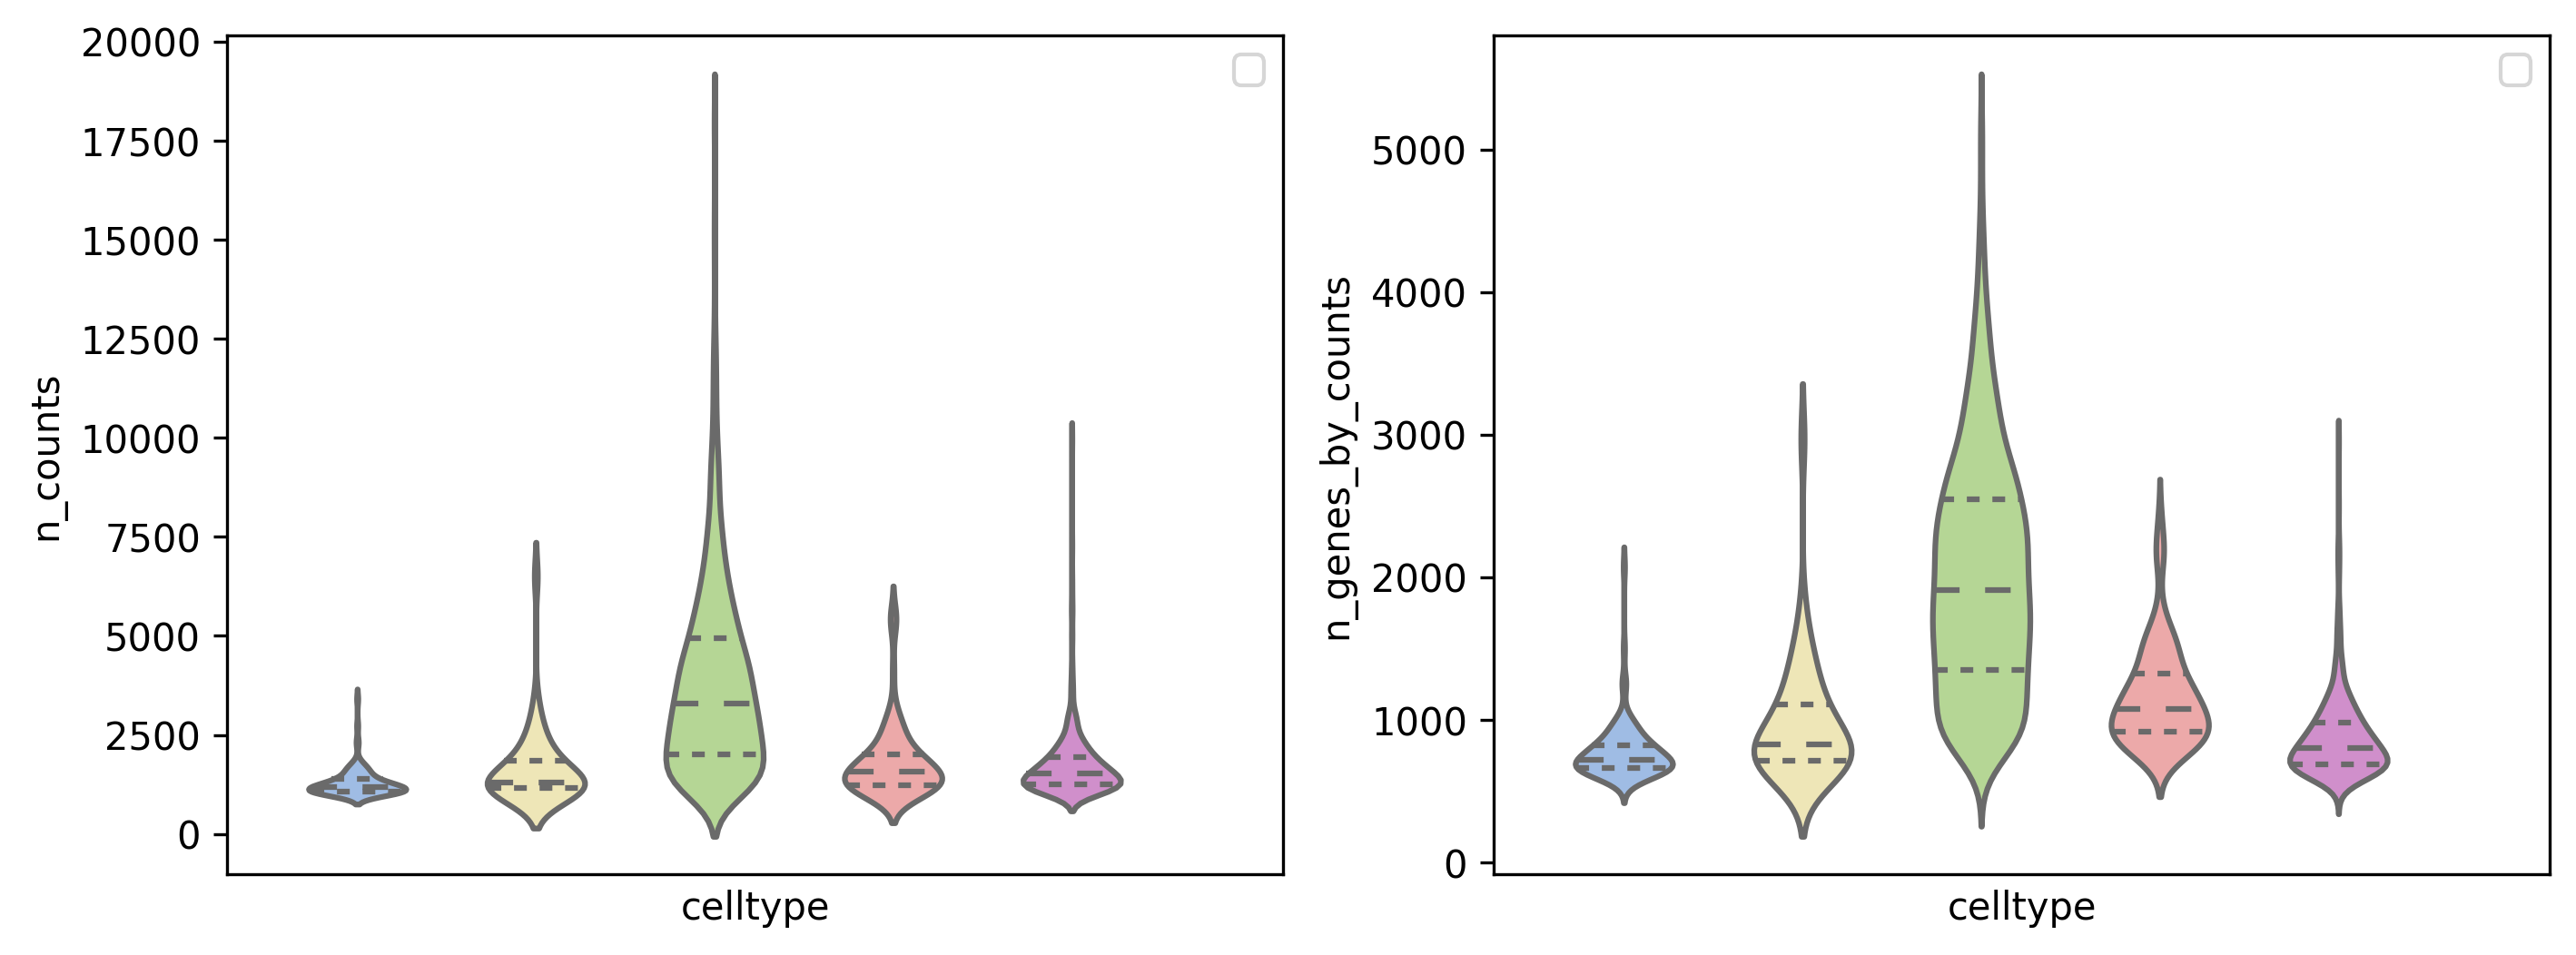

In [39]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.violinplot(adata.obs,x='celltype',y='n_counts',hue='celltype',split=False,inner='quart',palette=ctcolors, width=6)
plt.xlim((-4,9))
plt.xticks(())
plt.legend(())

plt.subplot(1,2,2)
sns.violinplot(adata.obs,x='celltype',y='n_genes_by_counts',hue='celltype',split=False,inner='quart',palette=ctcolors, width=6)
plt.xlim((-4,9))
plt.xticks(())
plt.legend(())
plt.savefig(directory + '/Figures/cellsQM.svg')

In [143]:
adata.obs

,Sample,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden,celltype
BF:AATTTCCCGTCA,BF,18130.0,5138,18130.0,953.0,5.256481,325.0,1.792609,0,Neurons
BF:TTGTTGCGTCCT,BF,17885.0,5113,17885.0,1012.0,5.658373,258.0,1.442550,0,Neurons
BF:AACGCGGTTCAC,BF,17996.0,4988,17996.0,891.0,4.951100,273.0,1.517004,0,Neurons
BF:CTTGAGAGCGCC,BF,15669.0,4781,15669.0,1218.0,7.773311,179.0,1.142383,0,Neurons
BF:TACACCCTCTCC,BF,17785.0,5129,17785.0,1141.0,6.415518,222.0,1.248243,0,Neurons
...,...,...,...,...,...,...,...,...,...,...
BI:ATCTGTGTCCCT,BI,1136.0,861,1136.0,21.0,1.848591,10.0,0.880282,0,Neurons
BI:GTGCCCTGATGC,BI,1006.0,602,1006.0,22.0,2.186879,8.0,0.795229,1,Oligodendrocytes
BI:TGTAACGTGTGA,BI,1090.0,868,1090.0,19.0,1.743119,8.0,0.733945,0,Neurons
BI:CCCACGCCACCA,BI,1017.0,805,1017.0,19.0,1.868240,19.0,1.868240,0,Neurons


In [144]:
adata.write_h5ad(directory + '/combined.h5ad')

In [2]:
adata = sc.read_h5ad(directory + '/combined.h5ad')

In [40]:
adata = adata[adata.obs.celltype=='Neurons']
adata.X.shape

(1936, 15075)

In [41]:
#change Drd1a to Drd1 .... ?
genelist = adata.var.index
genelist = np.array(genelist)
genelist[genelist=='Drd1a']='Drd1'
adata.var.index = genelist

In [ ]:
#prepare for Map My Cell

In [42]:
def get_ensembl_mappings():                                   
    # Set up connection to server                                               
    server = biomart.BiomartServer('http://useast.ensembl.org/biomart')         
    mart = server.datasets['mmusculus_gene_ensembl']                            
                                                                                
    # List the types of data we want                                            
    attributes = ['mgi_symbol','ensembl_gene_id']
                                                                                
    # Get the mapping between the attributes                                    
    response = mart.search({'attributes': attributes})                          
    data = response.raw.data.decode('ascii')                                    
                                                                                
    ensembl_to_genesymbol = {}                                                  
    # Store the data in a dict                                                  
    for line in data.splitlines():                                              
        line = line.split('\t')                                                 
        gene_symbol = line[0]                                                   
        ensembl_gene = line[1]                                                  
        ensembl_to_genesymbol[gene_symbol] = ensembl_gene                      
                                                                                
    return ensembl_to_genesymbol

In [43]:
mappings = get_ensembl_mappings()

In [44]:
varlist = adata.var.index.to_numpy()
varlistens = varlist.copy()
include = np.full(len(varlist),False)
gdb = list(mappings.keys())
for x in range(0,len(varlist)):
    if np.isin(varlist[x],gdb):
        varlistens[x]=mappings[varlist[x]]
        include[x]=True

In [45]:
adataS = ad.AnnData(adata[:,include].layers['counts'])
adataS.var.index=varlistens[include]
adataS.obs.index=adata.obs.index

In [46]:
adataS

AnnData object with n_obs × n_vars = 1936 × 13733

In [47]:
adataS.write_h5ad(directory + '/neuronsMMC.h5ad')

In [48]:
mmcdata = pd.read_csv(directory + '/mmc.csv', header=4, index_col=0)

In [49]:
adata.obs['class']=mmcdata['class_name'].astype('category')
adata.obs['subclass']=mmcdata['subclass_name'].astype('category')
adata.obs['supertype']=mmcdata['supertype_name'].astype('category')
adata.obs['cluster']=mmcdata['cluster_name'].astype('category')

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_54628/967811297.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['class']=mmcdata['class_name'].astype('category')


In [50]:
adata.obs

,Sample,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden,celltype,class,subclass,supertype,cluster
BF:AATTTCCCGTCA,BF,18130.0,5138,18130.0,953.0,5.256481,325.0,1.792609,0,Neurons,11 CNU-HYa GABA,082 CEA-BST Ebf1 Pdyn Gaba,0387 CEA-BST Ebf1 Pdyn Gaba_4,1396 CEA-BST Ebf1 Pdyn Gaba_4
BF:TTGTTGCGTCCT,BF,17885.0,5113,17885.0,1012.0,5.658373,258.0,1.442550,0,Neurons,11 CNU-HYa GABA,086 MPO-ADP Lhx8 Gaba,0405 MPO-ADP Lhx8 Gaba_4,1476 MPO-ADP Lhx8 Gaba_4
BF:AACGCGGTTCAC,BF,17996.0,4988,17996.0,891.0,4.951100,273.0,1.517004,0,Neurons,11 CNU-HYa GABA,088 BST Tac2 Gaba,0410 BST Tac2 Gaba_2,1501 BST Tac2 Gaba_2
BF:CTTGAGAGCGCC,BF,15669.0,4781,15669.0,1218.0,7.773311,179.0,1.142383,0,Neurons,11 CNU-HYa GABA,082 CEA-BST Ebf1 Pdyn Gaba,0384 CEA-BST Ebf1 Pdyn Gaba_1,1384 CEA-BST Ebf1 Pdyn Gaba_1
BF:TACACCCTCTCC,BF,17785.0,5129,17785.0,1141.0,6.415518,222.0,1.248243,0,Neurons,11 CNU-HYa GABA,088 BST Tac2 Gaba,0409 BST Tac2 Gaba_1,1494 BST Tac2 Gaba_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BI:AACAACTGCTTG,BI,1196.0,894,1196.0,10.0,0.836120,10.0,0.836120,6,Neurons,09 CNU-LGE GABA,063 STR D1 Sema5a Gaba,0282 STR D1 Sema5a Gaba_2,0996 STR D1 Sema5a Gaba_2
BI:ATCTGTGTCCCT,BI,1136.0,861,1136.0,21.0,1.848591,10.0,0.880282,6,Neurons,09 CNU-LGE GABA,064 STR-PAL Chst9 Gaba,0288 STR-PAL Chst9 Gaba_4,1011 STR-PAL Chst9 Gaba_4
BI:TGTAACGTGTGA,BI,1090.0,868,1090.0,19.0,1.743119,8.0,0.733945,6,Neurons,09 CNU-LGE GABA,064 STR-PAL Chst9 Gaba,0287 STR-PAL Chst9 Gaba_3,1009 STR-PAL Chst9 Gaba_3
BI:CCCACGCCACCA,BI,1017.0,805,1017.0,19.0,1.868240,19.0,1.868240,0,Neurons,11 CNU-HYa GABA,085 SI-MPO-LPO Lhx8 Gaba,0397 SI-MPO-LPO Lhx8 Gaba_2,1436 SI-MPO-LPO Lhx8 Gaba_2


In [51]:
del(adata.obsm,adata.obsp,adata.uns,adata.obs['n_counts'],adata.obs['leiden'],adata.obs['celltype'],adata.var['n_cells'])

In [52]:
adata

AnnData object with n_obs × n_vars = 1936 × 15075
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'class', 'subclass', 'supertype', 'cluster'
    var: 'mean', 'std'
    varm: 'PCs'
    layers: 'counts'

In [53]:
del(adata.varm,adata.var)

In [54]:
adata.write_h5ad(directory + '/neurons.h5ad')

In [55]:
#get color palettes
allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')

(classes,ci) = np.unique(allMeta['class'].to_numpy(),return_index=True)
cc = allMeta['class_color'].to_numpy()[ci]
classp = dict(zip(classes,cc))
classp['None']=(0.8,0.8,0.8,0.2)

(subclasses,si) = np.unique(allMeta['subclass'].to_numpy(),return_index=True)
scc = allMeta['subclass_color'].to_numpy()[si]
subclassp = dict(zip(subclasses,scc))
subclassp['None']=(0.8,0.8,0.8,0.2)

ntlist=allMeta['neurotransmitter'][allMeta['neurotransmitter']==allMeta['neurotransmitter']].to_numpy()
ntclist=allMeta['neurotransmitter_color'][allMeta['neurotransmitter']==allMeta['neurotransmitter']].to_numpy()
(neurotransmitters,ni) = np.unique(ntlist,return_index=True)
nc = ntclist[ni]
neurotransmitterp = dict(zip(neurotransmitters,nc))
neurotransmitterp['None']=(0.8,0.8,0.8,0.2)

del(allMeta)

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_54628/3778227727.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')


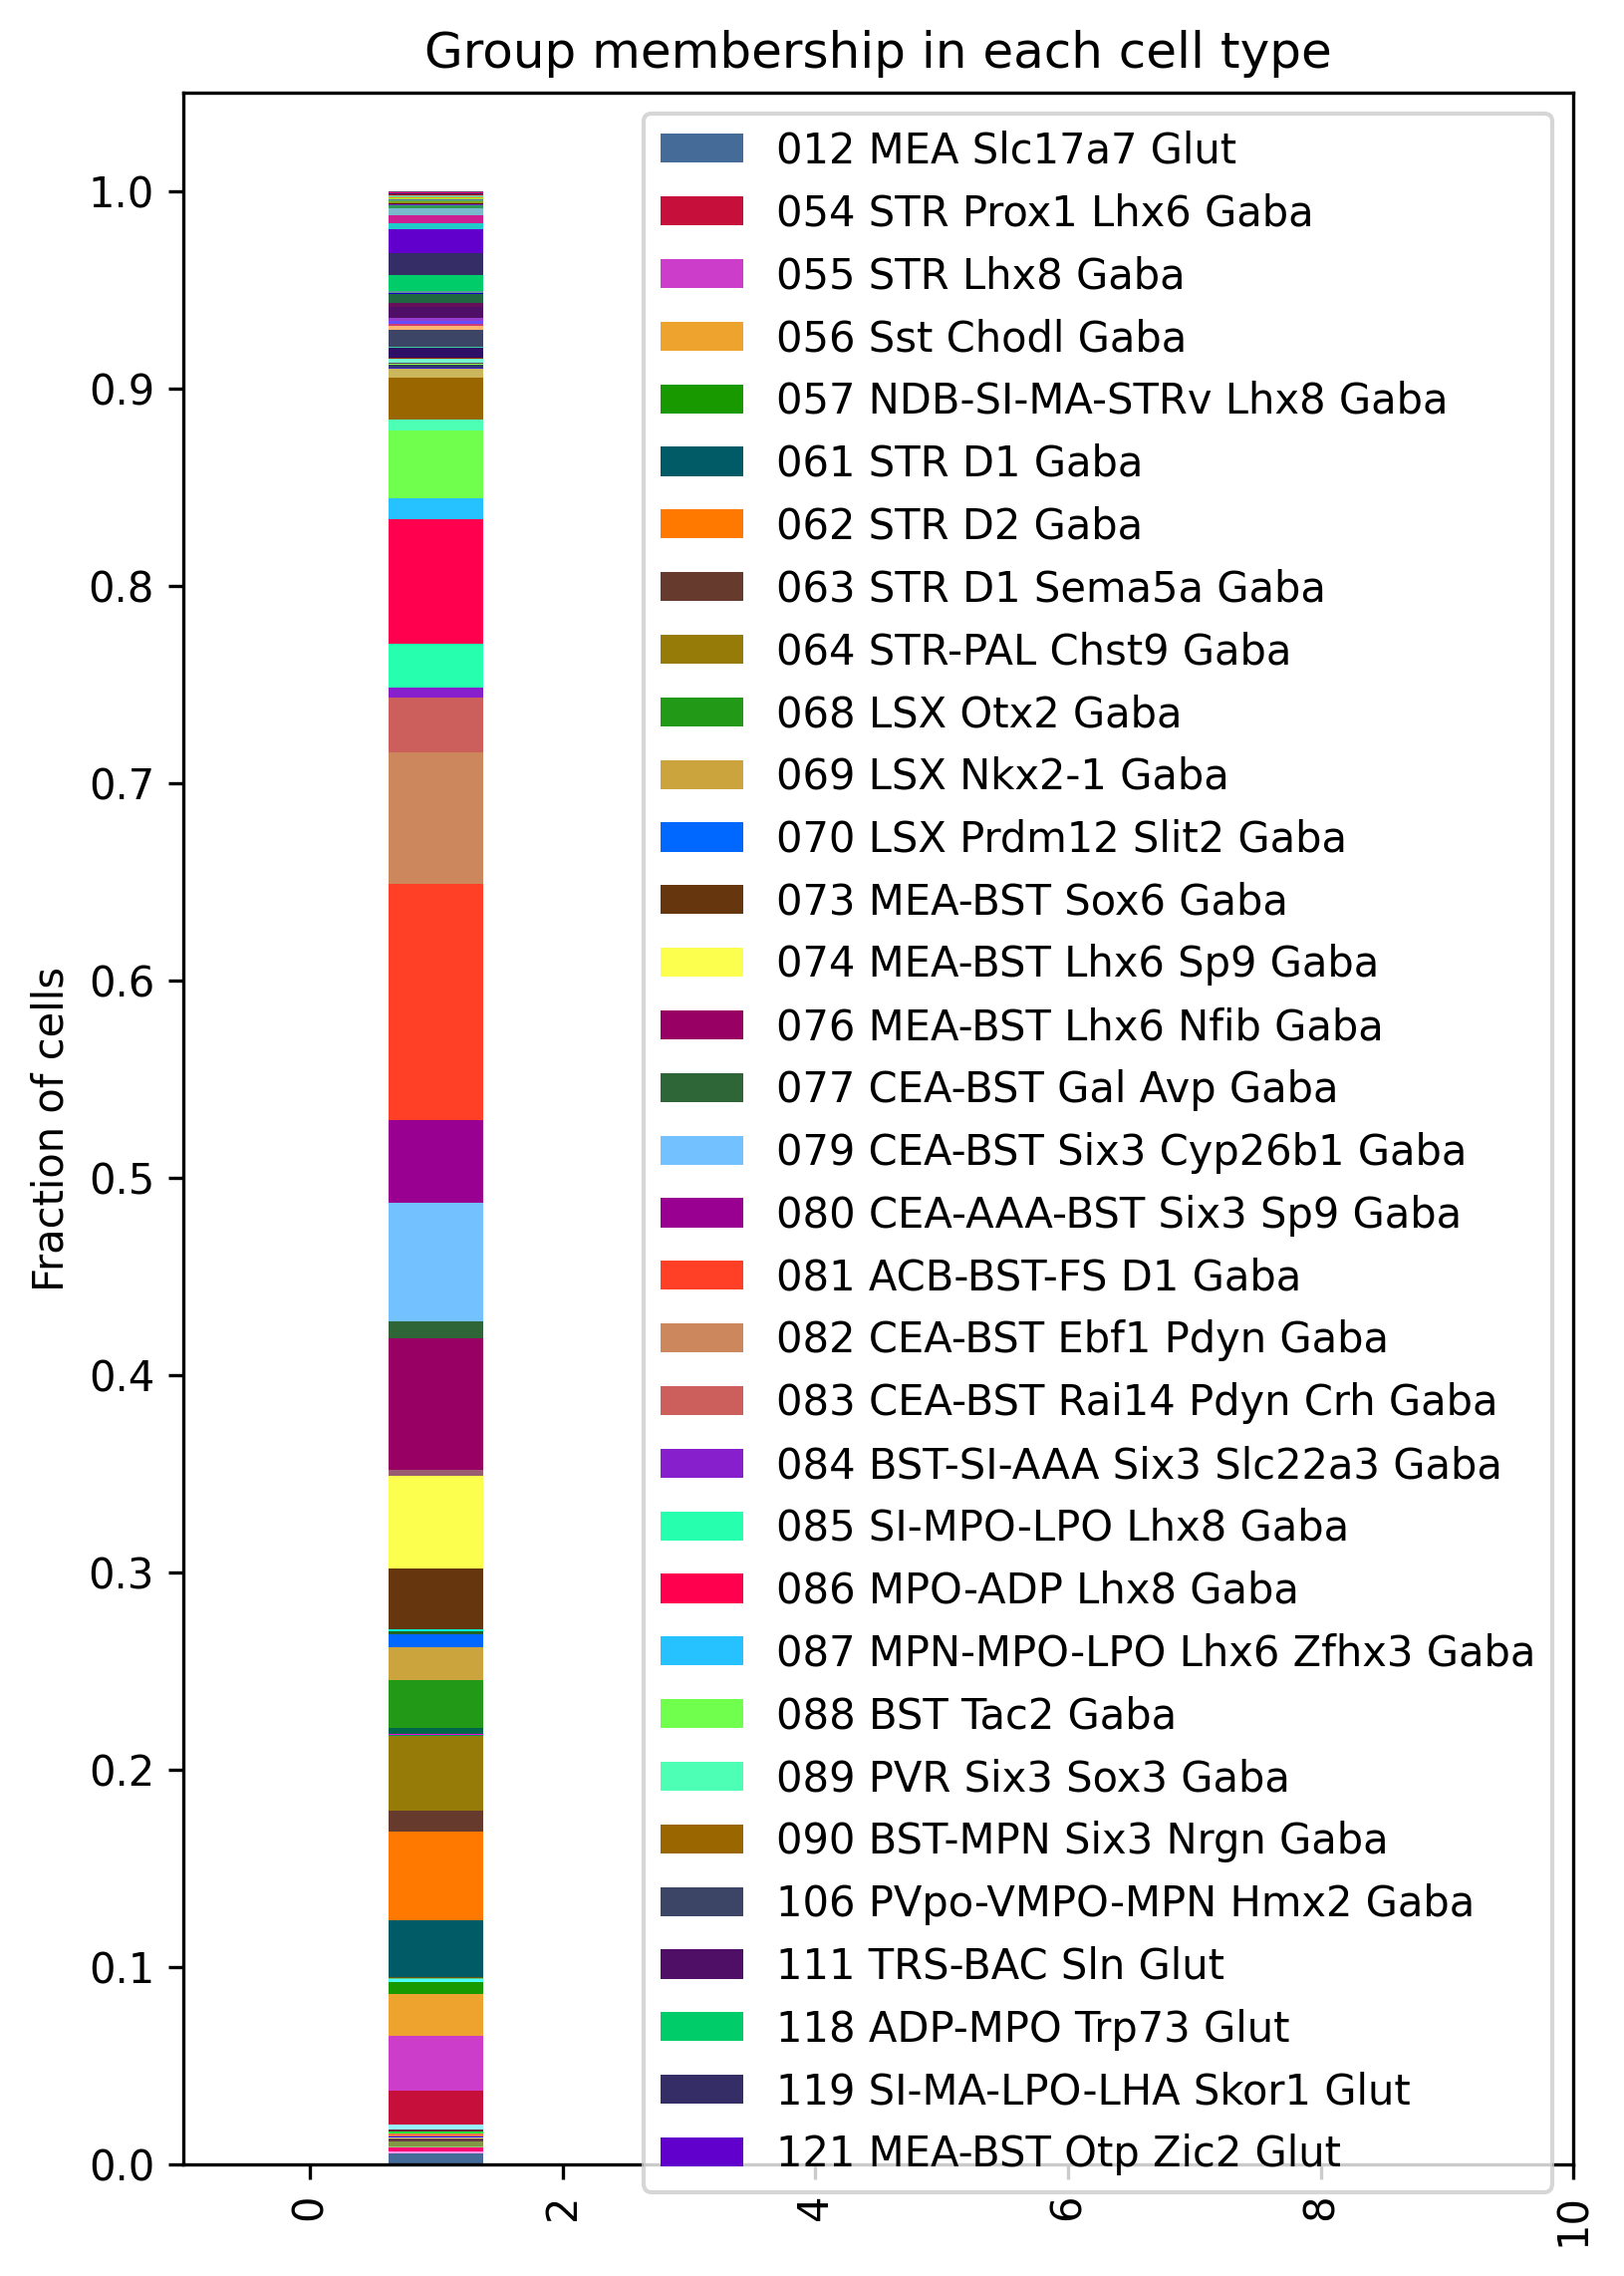

In [56]:
order = [1]
groupnames = np.unique(adata.obs['subclass'])
typecount=np.zeros((len(groupnames),len(order)))
for g in range(0,len(groupnames)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['subclass']==groupnames[g]))                   

tcn = np.divide(typecount,np.sum(typecount,axis=0))

width = 0.75

fig, ax = plt.subplots(figsize = (6,9))
bottom = np.zeros(len(order))

lhs=[]
inc=np.full((len(groupnames),1),False,dtype='bool')
inccolors=[]
for g in range(0,len(groupnames)):
    p = ax.bar(order, tcn[g,:], width, label=groupnames[g], bottom=bottom, color=subclassp[groupnames[g]])
    bottom += tcn[g,:]
    if np.max(tcn[g,0:5])>=0.005:
        lhs.append(p)
        inc[g]=True
        inccolors.append(subclassp[groupnames[g]])
inc=inc.squeeze()

ax.legend(handles=lhs,loc="upper right", ncols=1)

plt.title('Group membership in each cell type')
plt.xlim((-1,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Fraction of cells')
plt.savefig(directory + '/Figures/propSubclass.svg')